# ANÁLISIS DEL PBI PERUANO (USO DE API DEL BCRP)


## I. Introducción

<p style="text-align: justify;"> Practicamente todas las economías del mundo buscan crecer y esto se mide a través del PBI, el Perú no es la excepción. En este sentido, su comportamiento es importante. Desde ya, es fácil presuponer algunas características como la presencia de tendencia en la serie (por lo tanto, no estacionalidad) que nos planteará algunas observaciones. Empezaremos trabajando con el API del BCR para conseguir la base de datos. </p>

<p style="text-align: justify;"> Recomendamos tener una noción previa del uso de diccionarios y listas en Python </p>


## II. API del BCRP

In [130]:
#https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01288PM/html
#PN01770AM : PBI
#PN01142MM : índice bursátil
#PN01288PM:  índice de PM sin alimentos
url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
cod_ser="PN01770AM"   #[códigos de series mensuales]
formato="/json"
per="/2005-1/2019-12"
url=url_base+cod_ser+formato+per
print(url)
#args="address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&"+key_api
#No necesitamos poner la url en formato de diccionario, no hay "?" no usamos query con argumentos con key y values

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2005-1/2019-12


In [131]:
import requests
response=requests.get(url)
print(response)

'''200: Todo salió bien y se devolvió el resultado (si lo hubiera).
301: el servidor lo redirige a un punto final diferente. Esto puede suceder cuando una empresa cambia los nombres de dominio o se cambia el nombre de un punto final.
400: El servidor cree que realizó una solicitud incorrecta. Esto puede suceder cuando no envía los datos correctos, entre otras cosas.
401: el servidor cree que no está autenticado. Muchas API requieren credenciales de inicio de sesión, por lo que esto sucede cuando no envía las credenciales correctas para acceder a una API.
403: El recurso al que intentas acceder está prohibido: no tienes los permisos adecuados para verlo.
404: el recurso al que intentó acceder no se encontró en el servidor.
503: El servidor no está listo para manejar la solicitud'''

<Response [200]>


'200: Todo salió bien y se devolvió el resultado (si lo hubiera).\n301: el servidor lo redirige a un punto final diferente. Esto puede suceder cuando una empresa cambia los nombres de dominio o se cambia el nombre de un punto final.\n400: El servidor cree que realizó una solicitud incorrecta. Esto puede suceder cuando no envía los datos correctos, entre otras cosas.\n401: el servidor cree que no está autenticado. Muchas API requieren credenciales de inicio de sesión, por lo que esto sucede cuando no envía las credenciales correctas para acceder a una API.\n403: El recurso al que intentas acceder está prohibido: no tienes los permisos adecuados para verlo.\n404: el recurso al que intentó acceder no se encontró en el servidor.\n503: El servidor no está listo para manejar la solicitud'

In [132]:

#print(response.url)
#Extraemos en formato json
response_json=response.json()
print(response_json) 


'''if response.status_code==200:
    content=response.content '''

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}, 'periods': [{'name': 'Ene.2005', 'values': ['79.9791613436588']}, {'name': 'Feb.2005', 'values': ['80.134460157334']}, {'name': 'Mar.2005', 'values': ['81.3964132411787']}, {'name': 'Abr.2005', 'values': ['87.0734472979407']}, {'name': 'May.2005', 'values': ['92.1414553918693']}, {'name': 'Jun.2005', 'values': ['88.4557732759908']}, {'name': 'Jul.2005', 'values': ['87.276600902297']}, {'name': 'Ago.2005', 'values': ['82.9894833725657']}, {'name': 'Sep.2005', 'values': ['82.0878667862381']}, {'name': 'Oct.2005', 'values': ['84.8027241979274']}, {'name': 'Nov.2005', 'values': ['90.4951179010569']}, {'name': 'Dic.2005', 'values': ['91.5459269781851']}, {'name': 'Ene.2006', 'values': ['85.6590427598994']}, {'name': 'Feb.2006', 'values': ['84.6285223502132']}, {'name': 'Mar.2006', 'values': ['91.228693125431

'if response.status_code==200:\n    content=response.content '

In [133]:
for key in response_json.keys():
    print(key)

config
periods


In [134]:
print(response_json['config'])


{'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}


In [135]:
print(response_json['periods'])

[{'name': 'Ene.2005', 'values': ['79.9791613436588']}, {'name': 'Feb.2005', 'values': ['80.134460157334']}, {'name': 'Mar.2005', 'values': ['81.3964132411787']}, {'name': 'Abr.2005', 'values': ['87.0734472979407']}, {'name': 'May.2005', 'values': ['92.1414553918693']}, {'name': 'Jun.2005', 'values': ['88.4557732759908']}, {'name': 'Jul.2005', 'values': ['87.276600902297']}, {'name': 'Ago.2005', 'values': ['82.9894833725657']}, {'name': 'Sep.2005', 'values': ['82.0878667862381']}, {'name': 'Oct.2005', 'values': ['84.8027241979274']}, {'name': 'Nov.2005', 'values': ['90.4951179010569']}, {'name': 'Dic.2005', 'values': ['91.5459269781851']}, {'name': 'Ene.2006', 'values': ['85.6590427598994']}, {'name': 'Feb.2006', 'values': ['84.6285223502132']}, {'name': 'Mar.2006', 'values': ['91.2286931254313']}, {'name': 'Abr.2006', 'values': ['91.7780026508836']}, {'name': 'May.2006', 'values': ['97.7619066472792']}, {'name': 'Jun.2006', 'values': ['95.0729001070201']}, {'name': 'Jul.2006', 'values'

In [136]:
print(response_json['periods'][0])

{'name': 'Ene.2005', 'values': ['79.9791613436588']}


In [137]:
print(response_json['periods'][0]["values"])

#MORALEJA: IMPORTANTE DISTINGUIR LISTAS Y DICCIONARIOS EN PYTHON

['79.9791613436588']


In [138]:
#print(response_json.get("periods"))  #el método get me da un resultado parecido a response_json['periods']
periodos=response_json.get("periods")
price_index=[]
for i in periodos:
    valores_list=i['values']
    for w in valores_list:
        w=float(w)
        price_index.append(w)
    
#print(type(price_index[0]))
print(price_index)

    
    
    
    

[79.9791613436588, 80.134460157334, 81.3964132411787, 87.0734472979407, 92.1414553918693, 88.4557732759908, 87.276600902297, 82.9894833725657, 82.0878667862381, 84.8027241979274, 90.4951179010569, 91.5459269781851, 85.6590427598994, 84.6285223502132, 91.2286931254313, 91.7780026508836, 97.7619066472792, 95.0729001070201, 92.9616004138741, 91.5547630160115, 88.7693298777215, 92.1822069581638, 94.7874215284444, 99.4183590716473, 89.948891875024, 88.6754172656189, 96.7166807859656, 96.6358439215487, 104.744753291331, 101.255860662521, 102.534731811414, 100.113950462611, 100.225943716493, 103.154829161475, 104.110657226655, 111.882439819342, 98.5149773291643, 100.709860257349, 104.115307520329, 110.287664370675, 112.120913726693, 112.211609963734, 112.320516016464, 108.922292629548, 110.725068248671, 111.641043578987, 110.655001246582, 117.493523482104, 103.013101977079, 101.019865758232, 107.121546842635, 108.808082918569, 114.22464786173, 108.887627134331, 110.717741226661, 109.795538603

In [139]:
fechas=[]
for i in periodos:
    nombres=i['name']
    fechas.append(nombres)
    
print(fechas)

['Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Dic.2009', 'Ene.2010', 'Feb.2010', 'Mar.2010', 'Abr.2010', 'May.2010', 'Jun.2010', 'Jul.2010', 'Ago.2010', 'Sep.2010', 'Oct.2010', 'Nov.2010', 'Dic.2010', 'Ene.2011', 'Feb.2011', 'Mar.2011', 'Abr.2011', 'May.2011', 'Jun.2011', 'Jul.2011', 'Ago.2011', 'Sep.2011', 'Oct.2011', 'Nov.2011', 'Di

## III. Limpieza y creación de Data Frame

In [140]:

import pandas as pd

In [141]:
diccionario= {"Fechas":fechas, "Valores":price_index}
print(diccionario)

{'Fechas': ['Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Dic.2009', 'Ene.2010', 'Feb.2010', 'Mar.2010', 'Abr.2010', 'May.2010', 'Jun.2010', 'Jul.2010', 'Ago.2010', 'Sep.2010', 'Oct.2010', 'Nov.2010', 'Dic.2010', 'Ene.2011', 'Feb.2011', 'Mar.2011', 'Abr.2011', 'May.2011', 'Jun.2011', 'Jul.2011', 'Ago.2011', 'Sep.2011', 'Oct.2011', 'Nov

In [142]:
df = pd.DataFrame(diccionario)
#df.set_index(df['date'], inplace=True)
#df=df.drop(columns=['date'])
#df["Fechas"]=pd.to_datetime(df["Fechas"], infer_datetime_format=True)
#Hay nulls?
#df.isnull().sum()  #no hay
df

,Fechas,Valores
0,Ene.2005,79.979161
1,Feb.2005,80.134460
2,Mar.2005,81.396413
3,Abr.2005,87.073447
4,May.2005,92.141455
...,...,...
175,Ago.2019,172.844689
176,Sep.2019,172.464651
177,Oct.2019,176.009008
178,Nov.2019,174.036428


C:\Users\abner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución deL PBI')

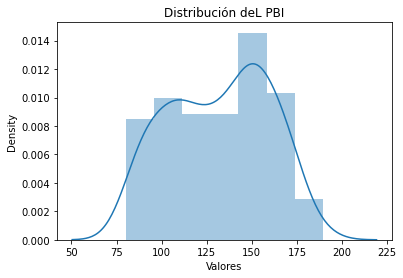

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['Valores'])
plt.title('Distribución deL PBI')

<AxesSubplot:>

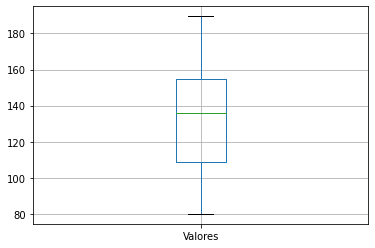

In [144]:
df.boxplot('Valores')


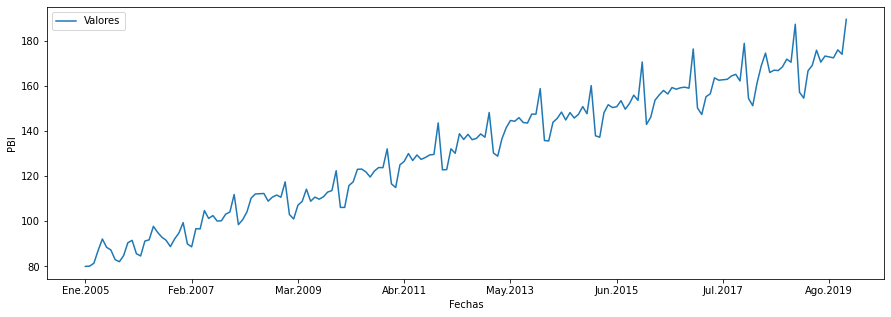

In [145]:

df.plot(x ='Fechas', y='Valores', figsize=(15, 5), kind = 'line')
plt.xlabel("Fechas")
plt.ylabel("PBI")
plt.show()